In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [30]:
# Load the dataset
file_path = 'Customers.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [53]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming df is your DataFrame

# Define imputers
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputers to the appropriate columns
df['Age'] = mean_imputer.fit_transform(df[['Age']])
df['Annual Income ($)'] = mean_imputer.fit_transform(df[['Annual Income ($)']])
df['Work Experience'] = mean_imputer.fit_transform(df[['Work Experience']])
df['Family Size'] = mean_imputer.fit_transform(df[['Family Size']])

# For the 'Profession' column (categorical), use mode imputation
df['Profession'] = mode_imputer.fit_transform(df[['Profession']]).ravel()

# Check for missing values after imputation
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

# Display the first few rows of the DataFrame to confirm changes
print(df.head())


Missing values after imputation:
 CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64
   CustomerID  Gender   Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male  19.0            15000.0                      39   
1           2    Male  21.0            35000.0                      81   
2           3  Female  20.0            86000.0                       6   
3           4  Female  23.0            59000.0                      77   
4           5  Female  31.0            38000.0                      40   

      Profession  Work Experience  Family Size  
0     Healthcare              1.0          4.0  
1       Engineer              3.0          3.0  
2       Engineer              1.0          1.0  
3         Lawyer              0.0          2.0  
4  Entertainment              2.0      

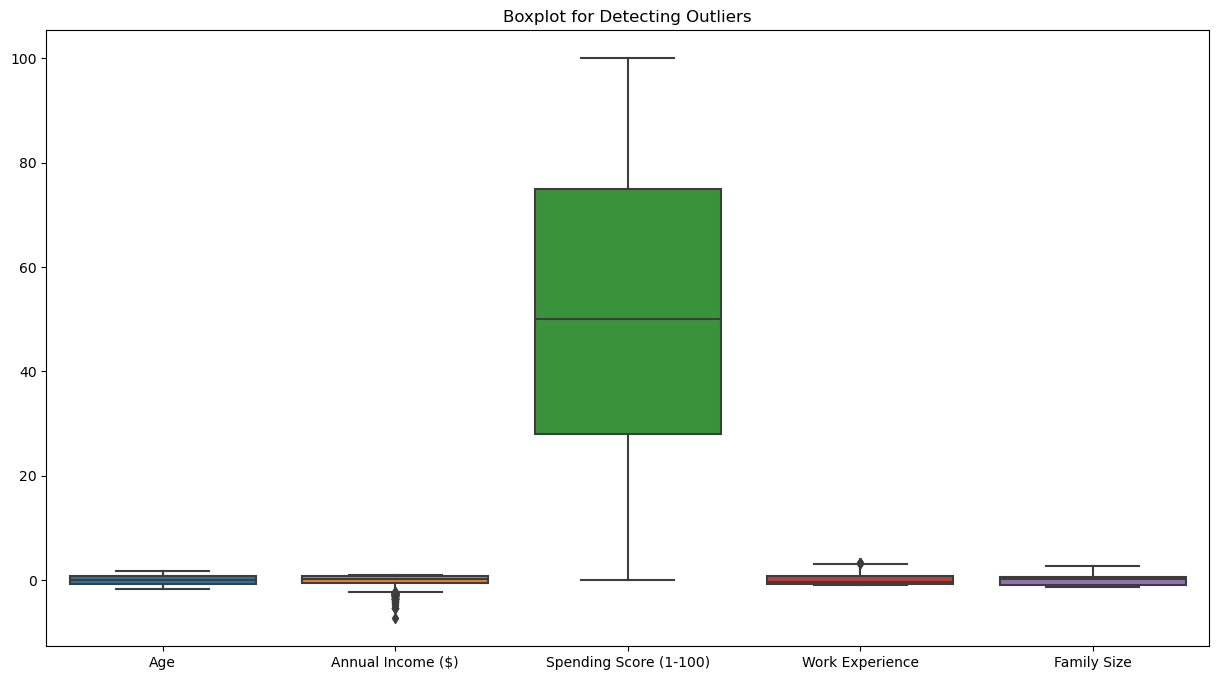

In [54]:
# Box plot to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']])
plt.title("Boxplot for Detecting Outliers")
plt.show()


In [55]:
# Encode categorical variables
label_encoder_gender = LabelEncoder()
label_encoder_profession = LabelEncoder()

df_cleaned['Gender'] = label_encoder_gender.fit_transform(df_cleaned['Gender'])
df_cleaned['Profession'] = label_encoder_profession.fit_transform(df_cleaned['Profession'])

print("Data after encoding categorical variables:\n", df_cleaned.head())


Data after encoding categorical variables:
    CustomerID  Gender       Age  Annual Income ($)  Spending Score (1-100)  \
0           1       1 -1.052345                NaN                      39   
1           2       1 -0.981941                NaN                      81   
2           3       0 -1.017143          -0.770476                       6   
3           4       0 -0.911538                NaN                      77   
4           5       0 -0.629924                NaN                      40   

   Profession  Work Experience  Family Size  
0           5        -0.787837     0.123358  
1           2        -0.278342    -0.384815  
2           2        -0.787837    -1.401161  
3           7        -1.042584    -0.892988  
4           3        -0.533089     1.139704  


C:\Users\ABDIWAHAB\AppData\Local\Temp\ipykernel_8684\40526834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = label_encoder_gender.fit_transform(df_cleaned['Gender'])
C:\Users\ABDIWAHAB\AppData\Local\Temp\ipykernel_8684\40526834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Profession'] = label_encoder_profession.fit_transform(df_cleaned['Profession'])


In [56]:
# Scale numerical variables
scaler = StandardScaler()
df_cleaned[['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']] = scaler.fit_transform(
    df_cleaned[['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']]
)

print("Data after scaling numerical variables:\n", df_cleaned.head())


Data after scaling numerical variables:
    CustomerID  Gender       Age  Annual Income ($)  Spending Score (1-100)  \
0           1       1 -1.052345                NaN                      39   
1           2       1 -0.981941                NaN                      81   
2           3       0 -1.017143          -0.661067                       6   
3           4       0 -0.911538                NaN                      77   
4           5       0 -0.629924                NaN                      40   

   Profession  Work Experience  Family Size  
0           5        -0.787837     0.123358  
1           2        -0.278342    -0.384815  
2           2        -0.787837    -1.401161  
3           7        -1.042584    -0.892988  
4           3        -0.533089     1.139704  


C:\Users\ABDIWAHAB\AppData\Local\Temp\ipykernel_8684\2097162768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']] = scaler.fit_transform(


In [35]:
# Summary statistics
summary_stats = df_cleaned.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
         CustomerID       Gender           Age  Annual Income ($)  \
count  1965.000000  1965.000000  1.965000e+03       1.965000e+03   
mean   1000.309924     0.406616 -1.301758e-16      -8.678385e-17   
std     578.443714     0.491327  1.000255e+00       1.000255e+00   
min       1.000000     0.000000 -1.721179e+00      -2.414027e+00   
25%     498.000000     0.000000 -8.411343e-01      -7.914507e-01   
50%    1000.000000     0.000000 -3.149350e-02      -1.870294e-02   
75%    1502.000000     1.000000  8.485509e-01       8.397457e-01   
max    2000.000000     1.000000  1.763797e+00       1.731868e+00   

       Spending Score (1-100)   Profession  Work Experience   Family Size  
count             1965.000000  1965.000000     1.965000e+03  1.965000e+03  
mean                51.078880     2.830534     1.446397e-17 -4.339192e-17  
std                 27.977176     2.544969     1.000255e+00  1.000255e+00  
min                  0.000000     0.000000    -1.042584e+00 -1

<Figure size 2000x1000 with 0 Axes>

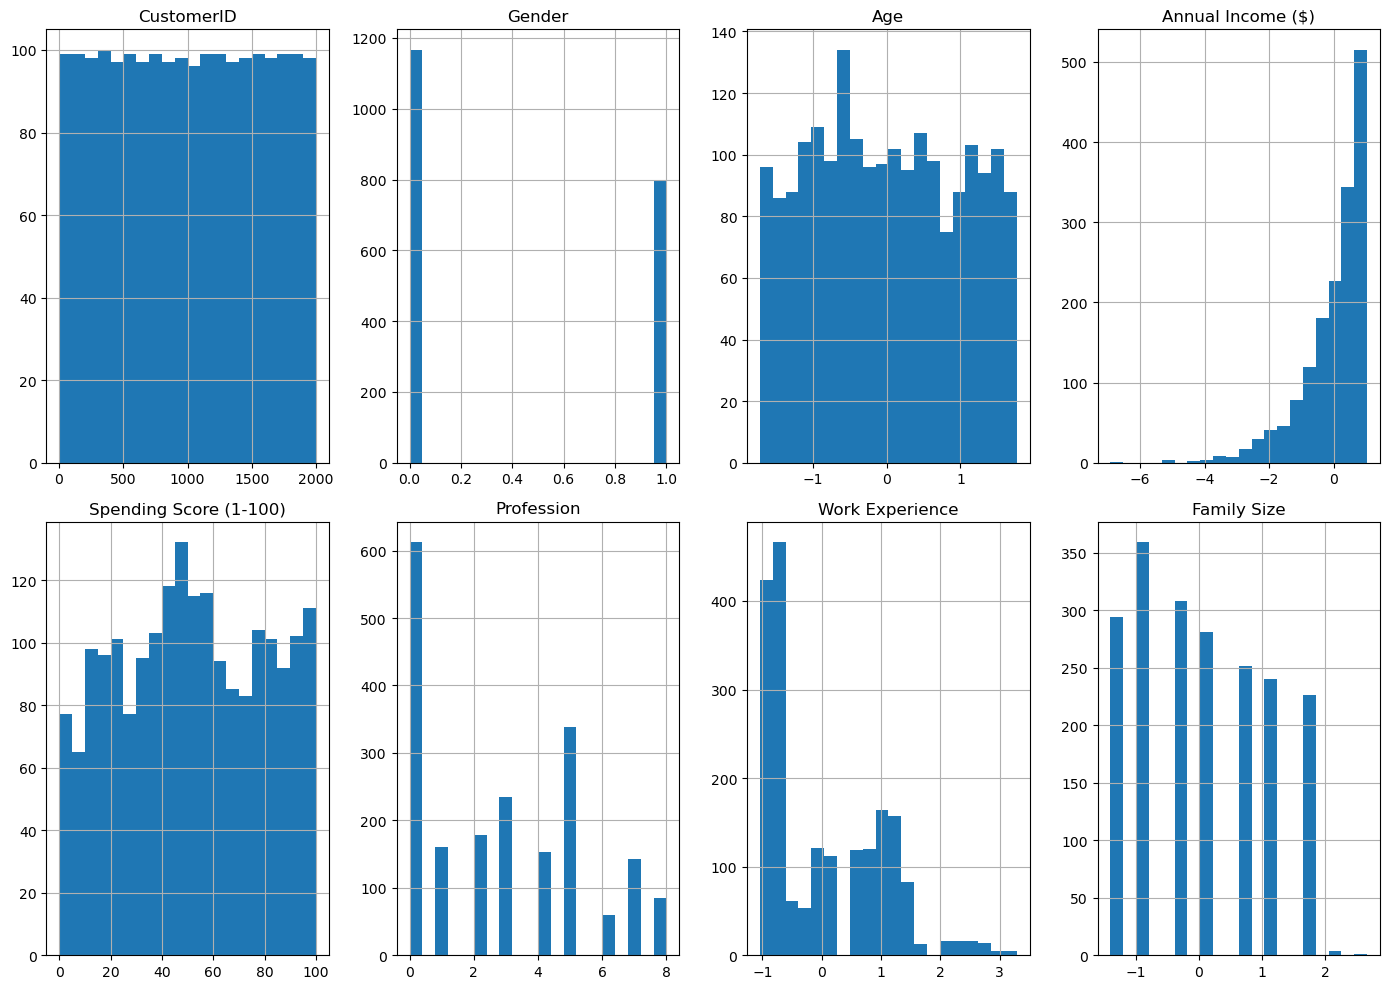

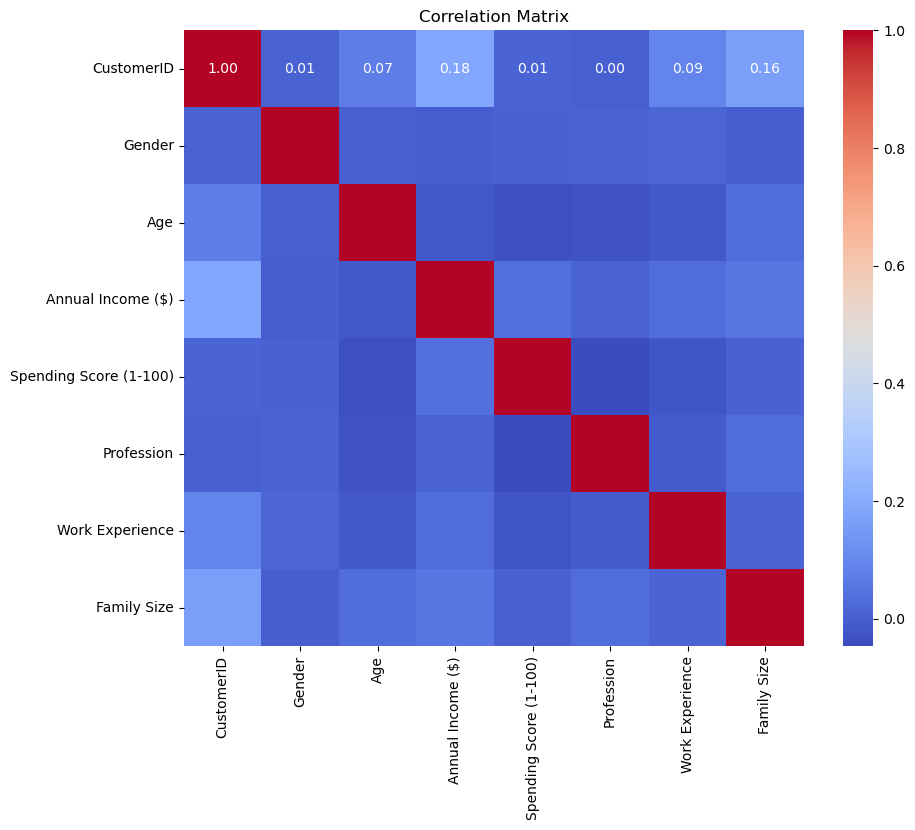

In [57]:
# Histograms for numerical features
plt.figure(figsize=(20, 10))
df_cleaned.hist(bins=20, figsize=(14,10), layout=(2, 4))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [85]:
# Assuming df is your DataFrame and it has been cleaned as before

# Drop non-numerical features that won't be used in clustering
X = df.drop(columns=['CustomerID', 'Spending Score (1-100)'])

# Encode categorical features
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Profession'] = label_encoder.fit_transform(X['Profession'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [86]:
# Initialize the K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Predict the cluster for each data point
clusters = kmeans.predict(X_scaled)

# Add the cluster assignments to the original DataFrame
df['Cluster'] = clusters


C:\Users\ABDIWAHAB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [92]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Use the reduced dimensions in clustering
gmm_pca = GaussianMixture(n_components=5, random_state=42)
clusters_pca = gmm_pca.fit_predict(X_pca)
silhouette_avg_pca = silhouette_score(X_pca, clusters_pca)
print(f"Silhouette Score after PCA: {silhouette_avg_pca}")


Silhouette Score after PCA: 0.3108611687699449


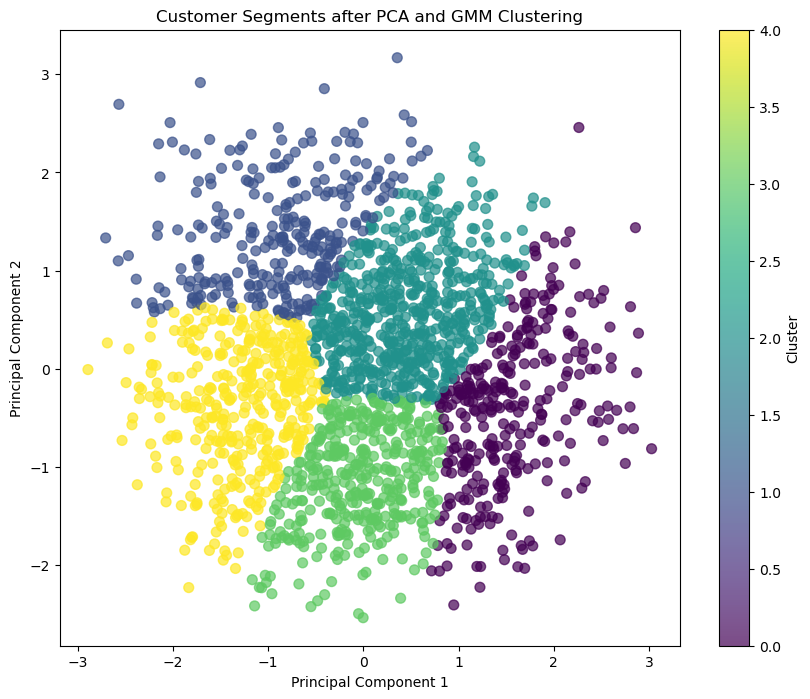

In [94]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 8))

# Scatter plot of the two principal components with cluster colors
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis', s=50, alpha=0.7)

# Annotate the plot
plt.title('Customer Segments after PCA and GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [96]:
# Check the components and the variance explained by them
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components:\n", pca.components_)


Explained Variance Ratio: [0.19052773 0.1723034 ]
Principal Components:
 [[-0.09975297 -0.18304933 -0.67152057 -0.09337951 -0.45173858 -0.54112377]
 [ 0.16913781 -0.76121516  0.05057428  0.49490993  0.32655329 -0.19445627]]
